In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import warnings 
warnings.

In [5]:
# Task 1: Investigate the Role of Race in Perception of Traits
df = pd.read_csv('../data/csv/bias.csv')
relevant_races = [1, 2, 3]  # White, Black, East Asian
df_race_filtered = df[df['Race'].isin(relevant_races)]

traits = ['Confident', 'Egotistic', 'Intelligent', 'Kind', 'Responsible', 
          'Trustworthy', 'Aggressive', 'Caring', 'Emotional', 'Friendly', 'Sociable']

# Perform one-way ANOVA for each trait
anova_results = {}
for trait in traits:
    grouped_data = [df_race_filtered[df_race_filtered['Race'] == race][trait] for race in relevant_races]
    anova_results[trait] = stats.f_oneway(*grouped_data).pvalue

In [6]:
# Task 2: Investigate the Role of Gender in Perception of Traits
ttest_results = {}
for trait in traits:
    male = df[df['Gender'] == 1][trait]
    female = df[df['Gender'] == 0][trait]
    ttest_results[trait] = stats.ttest_ind(male, female).pvalue

In [7]:
# Task 3: Rank the Most Significant Biases
combined_results = {**anova_results, **ttest_results}
sorted_biases = sorted(combined_results.items(), key=lambda x: x[1])

top_5_biases = sorted_biases[:5]

c:\Users\amant\anaconda3\envs\pytorch_dl\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\amant\anaconda3\envs\pytorch_dl\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\amant\anaconda3\envs\pytorch_dl\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\amant\anaconda3\envs\pytorch_dl\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

<Figure size 640x480 with 0 Axes>

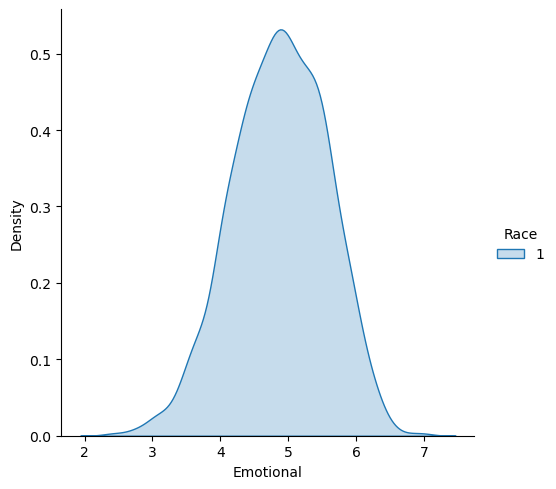

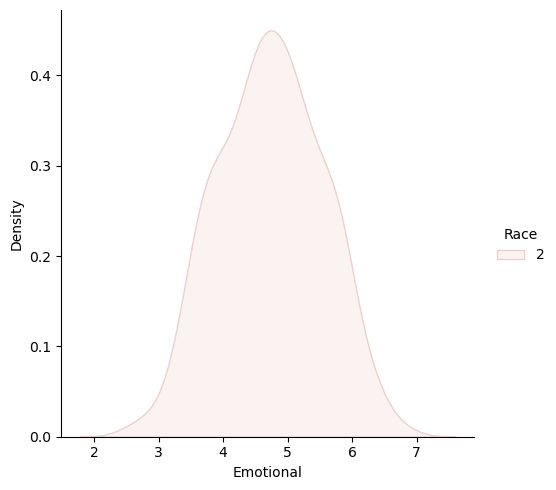

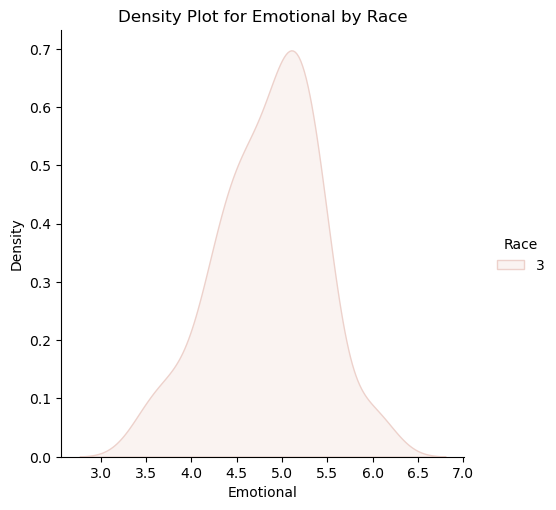

<Figure size 640x480 with 0 Axes>

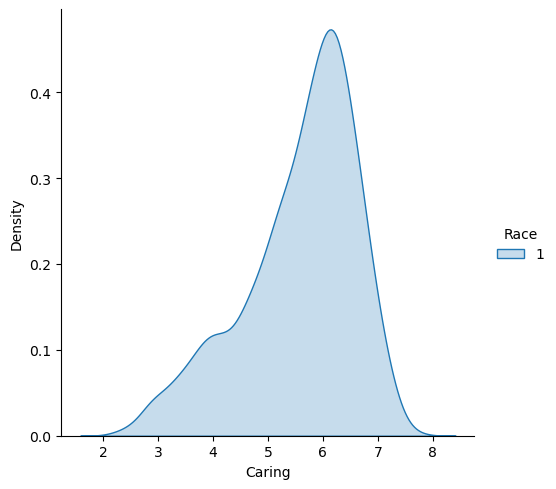

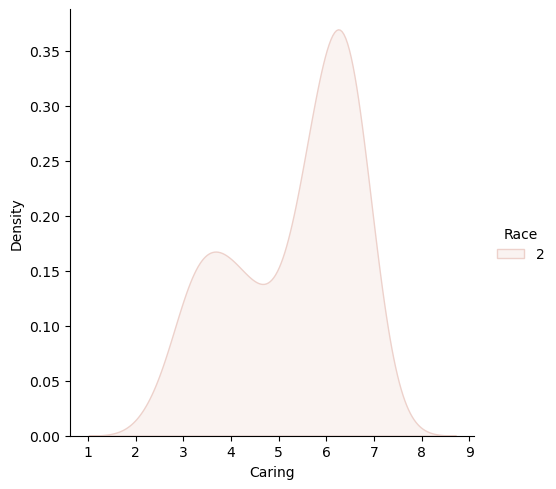

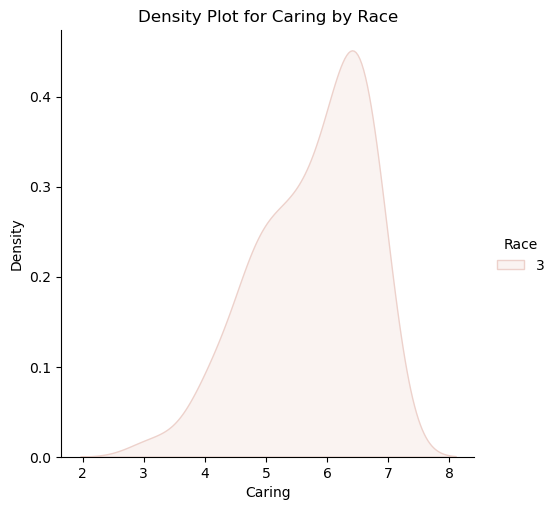

<Figure size 640x480 with 0 Axes>

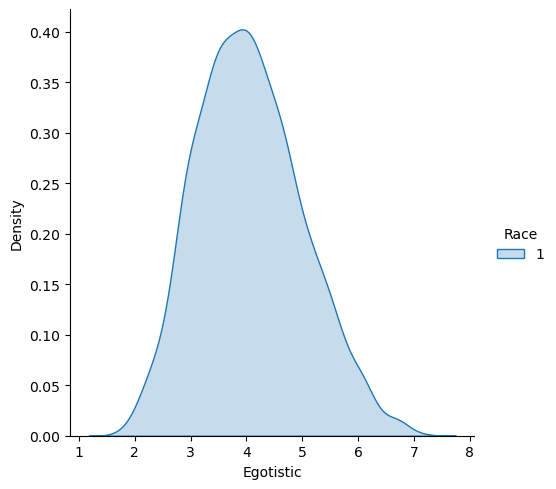

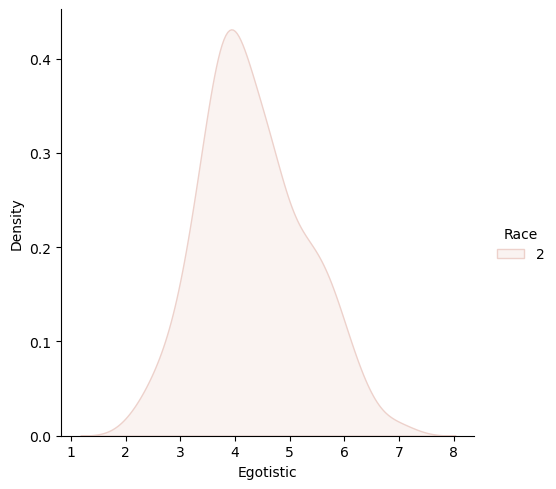

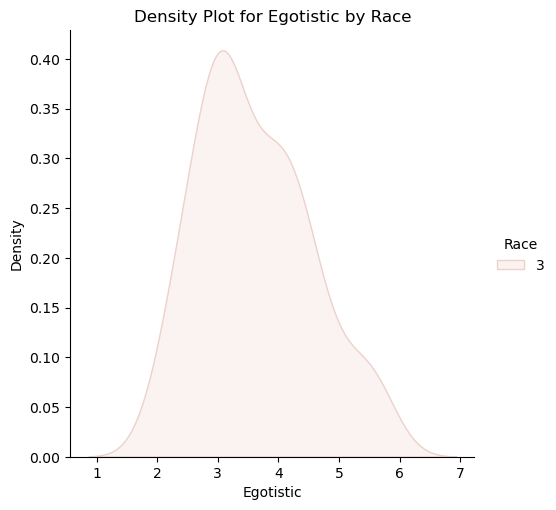

<Figure size 640x480 with 0 Axes>

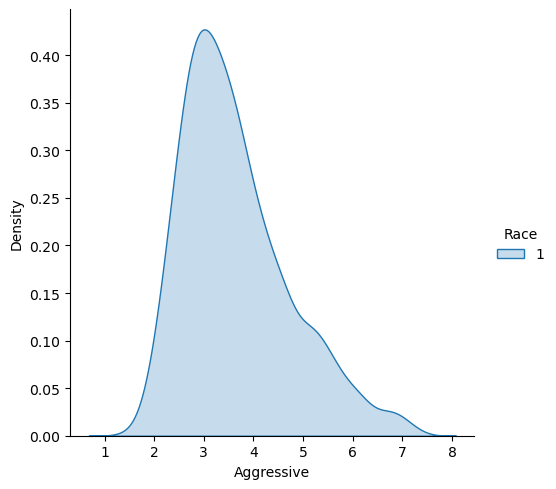

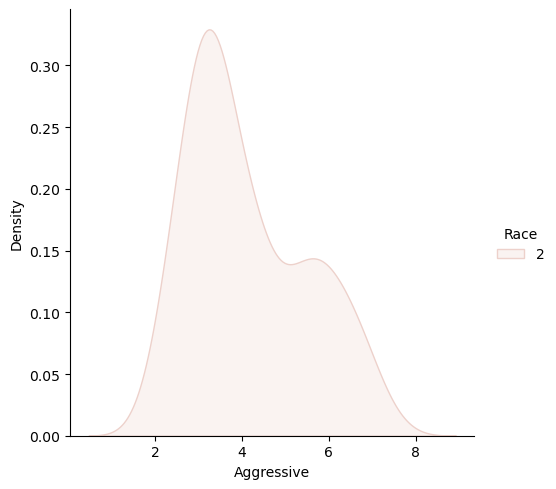

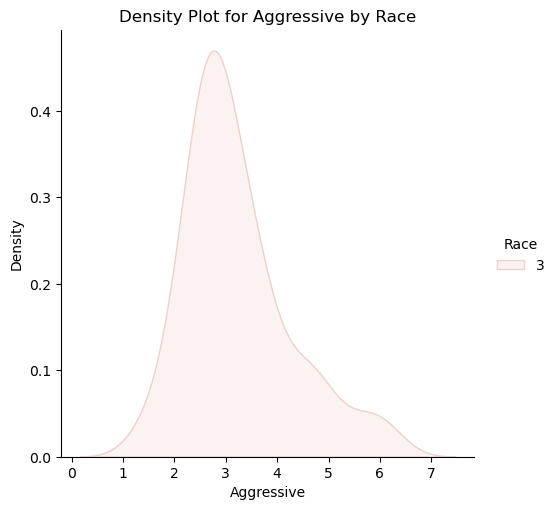

<Figure size 640x480 with 0 Axes>

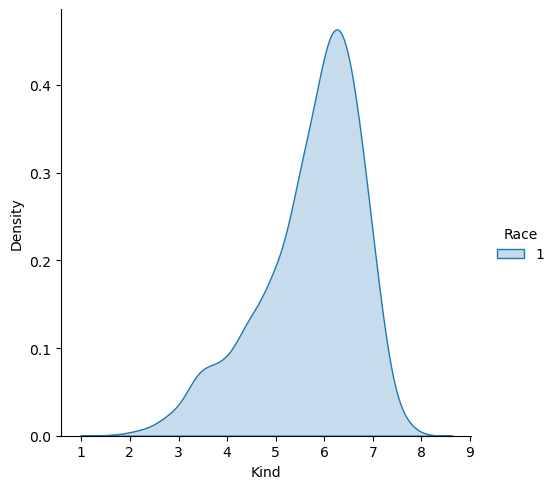

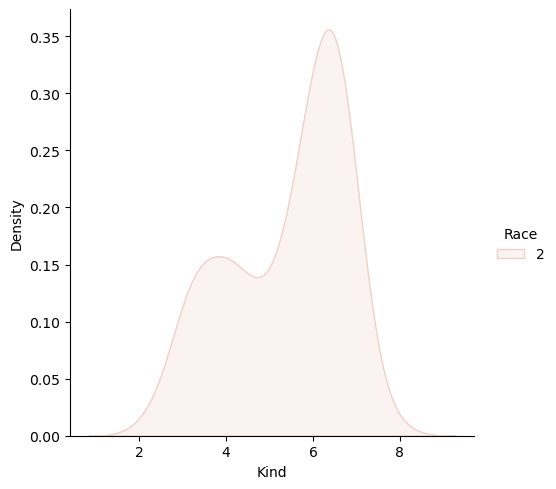

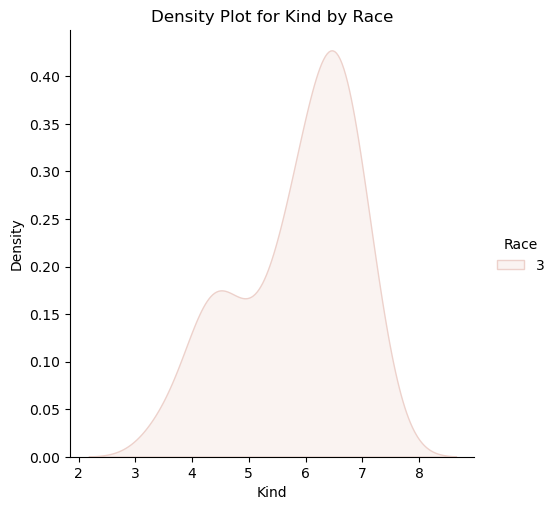

In [8]:
# Task 4: Plot Histograms for Significant Biases
for bias in top_5_biases:
    trait, _ = bias
    plt.figure()
    for race in relevant_races:
        sns.displot(df_race_filtered[df_race_filtered['Race'] == race], x=trait, kind="kde", hue="Race", fill=True)
    plt.title(f'Density Plot for {trait} by Race')


In [9]:

# Task 5: Identify Adverse Impacts Using the Four-Fifth Rule
qualified_rates = df.groupby('Race')['Qualified'].mean()
highest_rate = qualified_rates.max()
adverse_impact_races = qualified_rates[qualified_rates < highest_rate * 0.8].index.tolist()

print("ANOVA Results (Race and Traits):", anova_results)
print("T-Test Results (Gender and Traits):", ttest_results)
print("Top 5 Significant Biases:", top_5_biases)
print("Races with Adverse Impact:", adverse_impact_races)


ANOVA Results (Race and Traits): {'Confident': 0.5125652685487156, 'Egotistic': 1.4412211501758323e-07, 'Intelligent': 1.6711926732092035e-15, 'Kind': 0.00012878104123732718, 'Responsible': 8.005057161350754e-11, 'Trustworthy': 3.672594877204227e-06, 'Aggressive': 2.7078370672104353e-11, 'Caring': 0.00041893692225684995, 'Emotional': 0.02319487807768113, 'Friendly': 4.9774464052824096e-05, 'Sociable': 0.03449616164486741}
T-Test Results (Gender and Traits): {'Confident': 0.0002490671279198179, 'Egotistic': 5.724535735483598e-103, 'Intelligent': 6.617541566954897e-10, 'Kind': 3.6772754632964984e-84, 'Responsible': 5.314276336798082e-34, 'Trustworthy': 5.706506511591532e-73, 'Aggressive': 6.29311355462135e-101, 'Caring': 6.745136923994714e-105, 'Emotional': 1.029377924430242e-164, 'Friendly': 3.7108186188491455e-64, 'Sociable': 3.1946748840509533e-62}
Top 5 Significant Biases: [('Emotional', 1.029377924430242e-164), ('Caring', 6.745136923994714e-105), ('Egotistic', 5.724535735483598e-103